## Vehicle Routing Problem: Find the Optimal Route to Minimise Transportation Costs

In [1]:
from gurobipy import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Modified Dataset

In [2]:
df = pd.read_excel('pizza_demand_dataset.xlsx', sheet_name= 'Import For Python', engine='openpyxl')
df = df.iloc[:, :11]
df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hawaiian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mean,Causeway Point,Harbourfront Centre,Toa Payoh,Bukit Timah Plaza,Tampines Mall,NTU,NUS,Hougang Mall,Choa Chu Kang,Changi Airport
3,Sunday,59.1346,76.7885,65.5192,68.75,72.4808,60.8846,56.4808,58.6346,66.1538,59.4231
4,Monday,57.6731,78.25,65.9038,65.9038,74.7115,62.3654,54.75,57.2308,63.8077,61.0962
5,Tuesday,60.4615,80.9808,64.9615,75.1346,70.25,58.5769,56.3846,57.5577,64.75,65.3654
6,Wednesday,59.9811,82.7358,66.3396,69.2453,79.3774,64.2453,56.4906,57.4151,63.9057,62.3774
7,Thursday,57.9811,76.8113,61.434,65.4717,72.5472,61.1321,55.434,55.434,61.2642,60.283
8,Friday,57.0962,68.4038,56.7308,64.1923,66.9615,57.25,54.8846,53.2308,59.5192,58.8846
9,Saturday,56.9412,72,60.8039,63.7647,68.8824,59.4902,54.902,54.5882,60.3922,58.6667


### Preparing Data for Model

In [3]:
# hawaiian pizza mean demand and SD
hawaiian_demand = df.loc[2:9, ]
hawaiian_demand = hawaiian_demand.rename(columns=hawaiian_demand.iloc[0])
hawaiian_demand = hawaiian_demand.reset_index(drop = True)
hawaiian_demand = hawaiian_demand.loc[1:, ]
hawaiian_demand = hawaiian_demand.reset_index(drop = True)

hawaiian_sd = df.loc[11:18, ]
hawaiian_sd = hawaiian_sd.rename(columns=hawaiian_sd.iloc[0])
hawaiian_sd = hawaiian_sd.reset_index(drop = True)
hawaiian_sd = hawaiian_sd.loc[1:, ]
hawaiian_sd = hawaiian_sd.reset_index(drop = True)

# cheesy pizza mean demand and SD
pepperoni_demand = df.loc[21:28, ]
pepperoni_demand = pepperoni_demand.rename(columns=pepperoni_demand.iloc[0])
pepperoni_demand = pepperoni_demand.reset_index(drop = True)
pepperoni_demand = pepperoni_demand.loc[1:, ]
pepperoni_demand = pepperoni_demand.reset_index(drop = True)

pepperoni_sd = df.loc[30:37, ]
pepperoni_sd = pepperoni_sd.rename(columns=pepperoni_sd.iloc[0])
pepperoni_sd = pepperoni_sd.reset_index(drop = True)
pepperoni_sd = pepperoni_sd.loc[1:, ]
pepperoni_sd = pepperoni_sd.reset_index(drop = True)

# cheesy pizza mean demand and SD
cheesy_demand = df.loc[40:47, ]
cheesy_demand = cheesy_demand.rename(columns=cheesy_demand.iloc[0])
cheesy_demand = cheesy_demand.reset_index(drop = True)
cheesy_demand = cheesy_demand.loc[1:, ]
cheesy_demand = cheesy_demand.reset_index(drop = True)

cheesy_sd = df.loc[49:57, ]
cheesy_sd = cheesy_sd.rename(columns=cheesy_sd.iloc[0])
cheesy_sd = cheesy_sd.reset_index(drop = True)
cheesy_sd = cheesy_sd.loc[1:, ]
cheesy_sd = cheesy_sd.reset_index(drop = True)

## Monte Carlo Simulation

#### Choose the day of week to optimise delivery route:
<br/>
Please input <b>one</b> day of the week in this format: <br/>
"Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"

In [5]:
day_of_week = "Monday"

In [6]:
sd_h = hawaiian_sd.loc[hawaiian_sd["SD"]==day_of_week, "Causeway Point":].values.flatten().astype(int)
mean_h = hawaiian_demand.loc[hawaiian_demand["Mean"]==day_of_week, "Causeway Point":].values.flatten().astype(int)
cov_h = np.array([[sd_h[0] **2, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, sd_h[1] ** 2, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, sd_h[2] ** 2, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, sd_h[3] ** 2, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, sd_h[4] ** 2, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, sd_h[5] ** 2, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, sd_h[6] ** 2, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, sd_h[7] ** 2, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, sd_h[8] ** 2, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, sd_h[9] ** 2]])

sd_p = pepperoni_sd.loc[pepperoni_sd["SD"]==day_of_week, "Causeway Point":].values.flatten().astype(int)
mean_p = pepperoni_demand.loc[pepperoni_demand["Mean"]==day_of_week, "Causeway Point":].values.flatten().astype(int)
cov_p = np.array([[sd_p[0] **2, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, sd_p[1] ** 2, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, sd_p[2] ** 2, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, sd_p[3] ** 2, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, sd_p[4] ** 2, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, sd_p[5] ** 2, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, sd_p[6] ** 2, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, sd_p[7] ** 2, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, sd_p[8] ** 2, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, sd_p[9] ** 2]])

sd_c = cheesy_sd.loc[cheesy_sd["SD"]==day_of_week, "Causeway Point":].values.flatten().astype(int)
mean_c = cheesy_demand.loc[cheesy_demand["Mean"]==day_of_week, "Causeway Point":].values.flatten().astype(int)
cov_c = np.array([[sd_c[0] **2, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, sd_c[1] ** 2, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, sd_c[2] ** 2, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, sd_c[3] ** 2, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, sd_c[4] ** 2, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, sd_c[5] ** 2, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, sd_c[6] ** 2, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, sd_c[7] ** 2, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, sd_c[8] ** 2, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, sd_c[9] ** 2]])


## Vehicle Routing Problem

Dominic's has 10 pizza outlets namely Causeway Point, Harbourfront Centre, Toa Payoh, Bukit Timah Plaza, Tampines Mall, Nanyang Techonological University, National University of Singapore, Hougang Mall Singapore, Choa Chu Kang, Changi Airport (refer to location index guide below for more information on the location index). The purple dots in the plot below represents each outlet and the yellow pentagon represents the ingredient manufacturing plant.

In [7]:
n = 10 # number of outlets

    # coordinates of plant and outlets in the order of the location index guide
# longitude is x-axis
xc = np.array([103.8502, 103.7859, 103.8201, 103.8563, 103.7787, 103.9447, 
               103.6831, 103.7764, 103.8937, 103.747, 103.9898]) 
# latitude is y-axis
yc= np.array([1.296273, 1.436093, 1.264369, 1.334304, 1.338747, 1.352494, 
              1.34831, 1.296643, 1.372589, 1.38398, 1.360208]) 

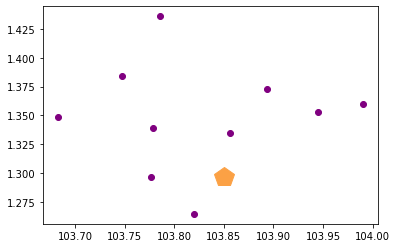

In [8]:
plt.plot(xc[0], yc[0], c= '#FBA145', marker='p', markersize=20)
plt.scatter(xc[1:], yc[1:], c='purple')

#### Model Parameters

In [9]:
# Parameters
N = [i for i in range(1, n+1)]                          # outlets   # [1, 2, 3, 4, 5]
V = [0] + N                                             # plant and outlets   # [0, 1, 2, 3, 4, 5]
A = [(i,j) for i in V for j in V if i != j]             # Arc set
Q = 1762000                                             # Truck Capacity: 3762000
H = 450                                                 # Fuel Capacity / Distance Capacity

# distances from location i to location j
real_dist = np.array([26.370,  6.999,  8.290, 10.788, 14.949, 23.584, 9.321, 15.346, 25.680, 18.741,
28.507, 27.588, 20.278, 14.916, 28.150, 18.087, 20.218, 21.032, 11.500, 32.388,
6.335, 27.374, 15.661, 12.160, 22.320, 20.143,  5.880, 22.717, 20.688, 24.343,
8.810, 20.437, 15.438, 11.594, 13.281, 22.968, 17.431, 13.628, 18.918, 17.894,
18.621, 13.957, 12.873, 10.968, 23.092, 13.022,  5.428, 23.439,  7.251, 27.705,
17.427, 25.043, 22.549, 13.837, 23.903, 35.277, 25.392, 11.129, 31.227,  7.538,
23.323, 17.817, 20.104, 22.643, 34.767, 13.189, 12.734, 35.114,  8.693, 39.381,
12.009, 20.059,  6.514, 17.070,  4.754, 27.936, 12.828, 28.333, 11.996, 29.959,
16.384, 18.830, 19.811, 10.420, 20.503, 10.085, 31.877, 21.719, 27.131, 17.062,
26.023, 10.440, 25.053, 18.370,  7.688, 30.494,  8.650, 11.853, 25.759, 35.108,
20.002, 31.435, 25.218, 19.606, 29.672,  9.887, 41.046, 28.999, 17.522, 36.996])

c = { (a): real_dist[t] for t,a in zip(range(110), A)}

#### Model Set-up

In [10]:
# Run time note: 100 iterations takes around 10 minutes

Sample_Size = 100
cost = np.zeros(Sample_Size)

for i in range(Sample_Size):
    
    # demand is sampled from multivariate normal distribution with mean and cov (and truncated above zero)
    D1 = np.maximum(np.random.multivariate_normal(mean_h, cov_h), 0)
    D2 = np.maximum(np.random.multivariate_normal(mean_p, cov_p), 0)
    D3 = np.maximum(np.random.multivariate_normal(mean_c, cov_c), 0)
    q1 = { i: D1[t] for i,t in zip(N, range(n))}
    q2 = { i: D2[t] for i,t in zip(N, range(n))}
    q3 = { i: D3[t] for i,t in zip(N, range(n))}
       
    vrp_model = Model('VRP')
    
    # Decision Variables
    x = vrp_model.addVars(A, vtype=GRB.BINARY)        # the binary decision to travel on respective arcs
    u = vrp_model.addVars(N, vtype=GRB.CONTINUOUS)
    u2 = vrp_model.addVars(N, vtype=GRB.CONTINUOUS) 
    u3 = vrp_model.addVars(N, vtype=GRB.CONTINUOUS)   
    e = vrp_model.addVars(N, vtype=GRB.CONTINUOUS)
    
    # Objective
    vrp_model.setObjective(quicksum(x[a] * c[a] for a in A), GRB.MINIMIZE)
       
    # Assignment constraints
    vrp_model.addConstrs(quicksum(x[i,j] for j in V if j != i) == 1 for i in N)
    vrp_model.addConstrs(quicksum(x[i,j] for i in V if i != j) == 1 for j in N)

    # Sub tour breaking constraints: truck capacity
    vrp_model.addConstrs((x[i,j] == 1) >> (u[i] + q1[j] == u[j]) for i,j in A if i!=0 and j!=0 )
    vrp_model.addConstrs(u[i] >= q1[i] for i in N)

    vrp_model.addConstrs((x[i,j] == 1) >> (u2[i] + q2[j] == u2[j]) for i,j in A if i!=0 and j!=0 )
    vrp_model.addConstrs(u2[i] >= q2[i] for i in N)

    vrp_model.addConstrs((x[i,j] == 1) >> (u3[i] + q3[j] == u3[j]) for i,j in A if i!=0 and j!=0 )
    vrp_model.addConstrs(u3[i] >= q3[i] for i in N)

    vrp_model.addConstrs(3500*u[i] + 2800*u2[i] + 2450*u3[i] <= Q for i in N)

    # Sub tour breaking constraints (fuel capacity/ distance capacity)
    vrp_model.addConstrs((x[i,j] == 1) >> (e[i] + c[i,j] == e[j]) for i,j in A if i!=0 and j!=0 )
    vrp_model.addConstrs(e[i] >= c[a] for i,a in zip (N, A))
    vrp_model.addConstrs(e[i] <= H for i in N)

    #Supressing the optimization output
    vrp_model.setParam( 'OutputFlag', False )
    
    # solving the model
    vrp_model.optimize()

    # store the minimum cost for the i-th sample
    cost[i] = vrp_model.objVal * 0.098 * 2.119


# compute the average of maximum sales
avg_cost = np.average(cost)

print('Average minimum travelling cost: $', avg_cost)

Academic license - for non-commercial use only - expires 2021-12-12
Using license file c:\gurobi912\gurobi.lic
Average minimum travelling cost: $ 35.61945421811229


#### The Optimal Route

**Location Index Guide:** <br/>
**0** - Singapore Management University (SMU) <br/>
**1** - Causeway Point <br/>
**2** - Harbourfront Centre<br/>
**3** - Toa Payoh<br/>
**4** - Bukit Timah Plaza<br/>
**5** - Tampines Mall<br/>
**6** - Nanyang Technological University (NTU) <br/>
**7** - National University of Singapore (NUS) <br/>
**8** - Hougang Mall<br/>
**9** - Choa Chu Kang<br/>
**10** - Changi Airport<br/>

In [11]:
travelled_arcs = [a for a in A if x[a].x > 0.99]
travelled_arcs

[(0, 1),
 (0, 2),
 (0, 7),
 (0, 8),
 (1, 9),
 (2, 0),
 (3, 0),
 (4, 3),
 (5, 10),
 (6, 0),
 (7, 4),
 (8, 5),
 (9, 6),
 (10, 0)]

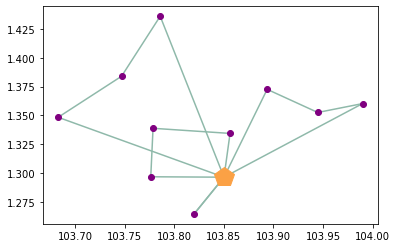

In [12]:
for i, j in travelled_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='#8FB9AA', zorder=0)
plt.plot(xc[0], yc[0], c='#FBA145', marker='p', markersize=20)
plt.scatter(xc[1:], yc[1:], c='purple')

# Knapsack Problem

In [ ]:
Capacity = 9548000
Cratesize= 95480

#ingredients list
#Ingredient 1 = Dough
#Ingredient 2 = Sauce
#Ingredient 3 = Pineapple
#Ingredient 4 = Cheese
#Ingredient 5 = Ham
#Ingredient 5 = pepperoni
Serving1=20
Serving2=30
Serving3=15
Serving4=50
Serving5=40
Serving6=50

#profits to be in terms of crates since we can only deliver in crates.
Value1=36
Value2=40
Value3=27
Value4=85
Value5=95
Value6=115

Chiller= 57 #ingredients 4,5,6 (cheese, ham , pepperoni)
Rack_Glass=20 #ingredient2 (signature sauce)
Rack_Can= 30 #ingredient 3 (pineapples)
Freezer=22 #ingredient 1 (dough)


ingredient1=[]
knapsack=Model("Knapsack")
for i in range(1,101):
    ingredient1.append("I1"+"C"+str(i))
    
Ingredient1=knapsack.addVars(ingredient1,name=ingredient1,vtype=GRB.BINARY)

ingredient2=[]
for i in range(1,101):
       ingredient2.append("I2"+"C"+str(i))
Ingredient2=knapsack.addVars(ingredient2,name=ingredient2,vtype=GRB.BINARY)

ingredient3=[]

for i in range(1,101):
       ingredient3.append("I3"+"C"+str(i))
    
Ingredient3=knapsack.addVars(ingredient3,name=ingredient3,vtype=GRB.BINARY)

ingredient4=[]
for i in range(1,101):
       ingredient4.append("I4"+"C"+str(i))
Ingredient4=knapsack.addVars(ingredient4,name=ingredient4,vtype=GRB.BINARY)


ingredient5=[]

for i in range(1,101):
       ingredient5.append("I5"+"C"+str(i))
Ingredient5=knapsack.addVars(ingredient5,name=ingredient5,vtype=GRB.BINARY)

ingredient6=[]
for i in range(1,101):
       ingredient6.append("I6"+"C"+str(i))
Ingredient6=knapsack.addVars(ingredient6,name=ingredient6,vtype=GRB.BINARY)


Totalvalue1=0
for i in Ingredient1:
    value1=Value1*Ingredient1[i]
    Totalvalue1=value1+Totalvalue1

Totalvalue2=0
for i in Ingredient2:
    value2=Value2*Ingredient2[i]
    Totalvalue2=value2+Totalvalue2

    
Totalvalue3=0
for i in Ingredient3:
    value3=Value3*Ingredient3[i]
    Totalvalue3=value3+Totalvalue3

Totalvalue4=0
for i in Ingredient4:
    value4=Value4*Ingredient4[i]
    Totalvalue4=value4+Totalvalue4    
    
Totalvalue5=0
for i in Ingredient5:
    value5=Value5*Ingredient5[i]
    Totalvalue5=value5+Totalvalue5

Totalvalue6=0
for i in Ingredient6:
    value6=Value6*Ingredient6[i]
    Totalvalue6=value6+Totalvalue6 

knapsack.setObjective((Totalvalue1+Totalvalue2+Totalvalue3+Totalvalue4+Totalvalue5+Totalvalue6),GRB.MAXIMIZE)

#supermarket constraint
#in freezer (dough)
Total_freezer=0
for i in Ingredient1:
    amount1=Ingredient1[i]
    Total_freezer=amount1+Total_freezer

#in rack (glass)
Total_glass=0
for i in Ingredient2:
    amount2=Ingredient2[i]
    Total_glass=amount2+Total_glass
    
#in rack (canned)
Total_canned=0
for i in Ingredient3:
    amount3=Ingredient3[i]
    Total_canned=amount3+Total_canned
    
#in chiller
#ingredient 4
Total_four=0
for i in Ingredient4:
    amount4=Ingredient4[i]
    Total_four=amount4+Total_four
    
#ingredient5
Total_five = 0
for i in Ingredient5:
    amount5=Ingredient5[i]
    Total_five=amount5+Total_five

#ingredient6
Total_six=0
for i in Ingredient6:
    amount6=Ingredient6[i]
    Total_six=amount6+Total_six
    
Total_chiller=Total_four+Total_five+Total_six


knapsack.addConstr(Total_freezer<=Freezer)
knapsack.addConstr(Total_glass<=Rack_Glass)
knapsack.addConstr(Total_canned<=Rack_Can)
knapsack.addConstr(Total_chiller<=Chiller)


#total_space taken up less than capacity
Total_space1=0
for i in Ingredient1:
    space1=Cratesize*Ingredient1[i]
    Total_space1=space1+Total_space1
    
Total_space2=0
for i in Ingredient2:
    space2=Cratesize*Ingredient2[i]
    Total_space2=space2+Total_space2
    
    
Total_space3=0
for i in Ingredient3:
    space3=Cratesize*Ingredient3[i]
    Total_space3=space3+Total_space3
    
Total_space4=0
for i in Ingredient4:
    space4=Cratesize*Ingredient4[i]
    Total_space4=space4+Total_space4
    
Total_space5=0
for i in Ingredient5:
    space5=Cratesize*Ingredient5[i]
    Total_space5=space5+Total_space5
    
Total_space6=0
for i in Ingredient6:
    space6=Cratesize*Ingredient6[i]
    Total_space6=space6+Total_space6
    
Total_space=Total_space1+Total_space2+Total_space3+Total_space4+Total_space5+Total_space6
knapsack.addConstr(Total_space<=Capacity)
knapsack.optimize()

In [ ]:
i1crates = Ingredient1.sum().getValue()
print("Truck should hold ",i1crates,"crates of Dough")
i2crates=Ingredient2.sum().getValue()
print("Truck should hold ",i2crates,"crates of Sauces")
i3crates = Ingredient3.sum().getValue()
print("Truck should hold ",i3crates,"crates of Pineapple")
i4crates=Ingredient4.sum().getValue()
print("Truck should hold ",i4crates,"crates of Cheese")
i5crates = Ingredient5.sum().getValue()
print("Truck should hold ",i5crates,"crates of Ham")
i6crates=Ingredient6.sum().getValue()
print("Truck should hold ",i6crates,"crates of Pepperoni slices")

print("Total truck space used : ",(i1crates+i2crates+i3crates+i4crates+i5crates+i6crates)*Cratesize)
print("Total profit of these ingredients: ",(i1crates*Value1)+(i2crates*Value2)+(i3crates*Value3)+(i4crates*Value4)+(i5crates*Value5)+(i6crates*Value6))
print("Total Dough servings :" ,(i1crates*Serving1))
print("Total Sauces servings :" ,(i2crates*Serving2))
print("Total Pineapple servings :" ,(i3crates*Serving3))
print("Total Cheese servings :" ,(i4crates*Serving4))
print("Total Ham  servings :" ,(i5crates*Serving5))
print("Total Pepperoni servings :" ,(i6crates*Serving6))